You can edit this notebook after copying to your drive.  
Click "Playgroundで開く" above and try them!  
  
(C) 2019 Tokyo Institute of Technology All Rights Reserved.  
@author Tatsuya Hiraoka  

In [ ]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv
import itertools

# proximal gradient

In [ ]:
def st_ops(mu, q):
  x_proj = np.zeros(mu.shape)
  for i in range(len(mu)):
    if mu[i] > q:
      x_proj[i] = mu[i] - q
    else:
      if np.abs(mu[i]) < q:
        x_proj[i] = 0
      else:
        x_proj[i] = mu[i] + q;
  return x_proj

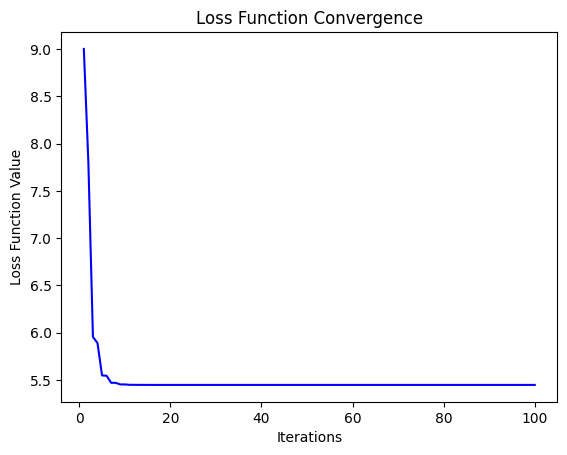

In [ ]:
# we need to control this parameter to generate multiple figures
lam = 1;
#lam = 4;
#lam = 6;
#lam = 3.89;

x_1 = np.arange(-1.5, 3, 0.01)
x_2 = np.arange(-1.5, 3, 0.02)

X1, X2 = np.mgrid[-1.5:3:0.01, -1.5:3:0.02]
fValue = np.zeros((len(x_1), len(x_2)))

A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

for i in range(len(x_1)):
  for j in range(len(x_2)):
        inr = np.vstack([x_1[i], x_2[j]])
        fValue[i, j] = np.dot(np.dot((inr-mu).T, A), (inr- mu)) + lam * (np.abs(x_1[i]) + np.abs(x_2[j]))

# cvx
w_lasso = cv.Variable((2,1))
obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
objective = cv.Minimize(obj_fn)
constraints = []
prob = cv.Problem(objective, constraints)
result = prob.solve(solver=cv.CVXOPT)
w_lasso = w_lasso.value

#plt.contour(X1, X2, fValue)

x_init = np.array([[ 3],
                   [-1]])
L = np.max(np.linalg.eig(A)[0])

x_history = []
loss_values = []
xt = x_init
for t in range(100):
    x_history.append(xt.T)
    grad = 2 * np.dot(A, xt - mu)
    xth = xt - 1 / L * grad
    xt = st_ops(xth, lam * 1 / L)
    loss = np.dot(np.dot((xt - mu).T, A), (xt - mu)) + lam * np.sum(np.abs(xt))
    loss_values.append(loss)

x_history = np.vstack(x_history)
loss_values = np.array(loss_values).flatten()  # Flatten the 2D array


plt.plot(np.arange(1, len(loss_values) + 1), loss_values, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Loss Function Value')
plt.title('Loss Function Convergence')
plt.show()

In [ ]:
# we need to control this parameter to generate multiple figures
lam = 1;

A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])
w_history_0 = []
w_history_1 = []
for lam in range(1,1000):
  lam = lam*0.01
# cvx
  w_lasso = cv.Variable((2,1))
  obj_fn = cv.quad_form(w_lasso - mu, A) +  lam * cv.norm(w_lasso, 1)
  objective = cv.Minimize(obj_fn)
  constraints = []
  prob = cv.Problem(objective, constraints)
  result = prob.solve(solver=cv.CVXOPT)
  w_lasso = w_lasso.value
  w_history_0.append(w_lasso[0])
  w_history_1.append(w_lasso[1])



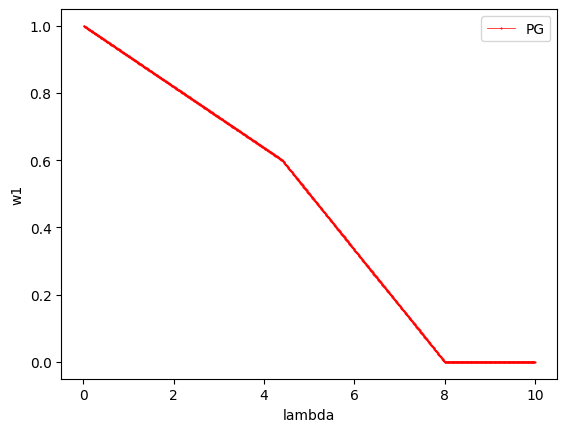

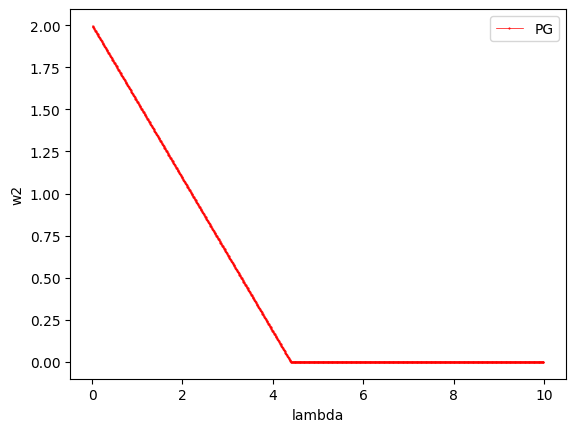

In [ ]:
x = range(1,1000)
plt.figure(1)
plt.plot(list(map(lambda x: x*0.01, x)),w_history_0, 'ro-', linewidth=0.5, markersize=0.5, label='PG')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('w1')

plt.figure(2)
plt.plot(list(map(lambda x: x*0.01, x)),w_history_1, 'ro-', linewidth=0.5, markersize=0.5, label='PG')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('w2')
plt.show()

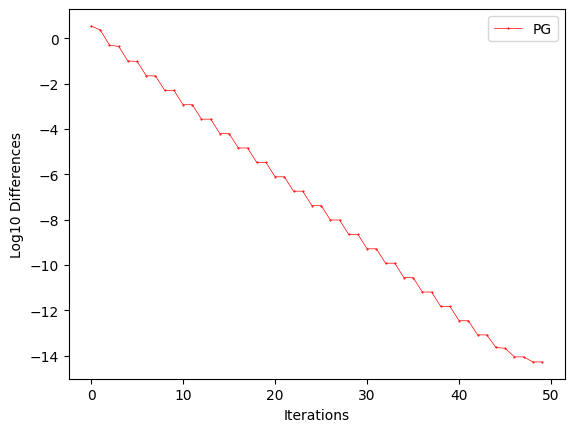

In [ ]:
loss_difference = []
for t in range(50):
  loss_difference.append(np.log10(np.abs(loss_values[t]-loss_values[99])))

plt.plot(loss_difference, 'ro-', linewidth=0.5, markersize=0.5, label='PG')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Log10 Differences')
plt.show()
